# Libraries

In [33]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

here is the data from another splitted dataset which can be potentially used in the model training or validation

In [ ]:
# pd.set_option('display.max_colwidth', None)
# path = './dataset_5_1'
# os.listdir(path)
# train_neg_path = path+'/train/pos'
# files = [f for f in os.listdir(train_neg_path) if f.lower().endswith('.txt')]
# files = sorted(files) 

# rows = []
# for i, fname in enumerate(files, start=1):
#     file_path = os.path.join(train_neg_path, fname)
#     with open(file_path, 'r', encoding='utf-8') as fh:
#         text = fh.read()
#     rows.append({'filename': fname, 'text': text})
# df_docs = pd.DataFrame(rows)
# display(df_docs.head(2))
# df_docs.text[0]

# Data analysis and cleaning

In [72]:
test = pd.read_csv('test_tg.csv')
train = pd.read_csv('train_tg.csv')
test.head()
cols_to_drop = ['Unnamed: 0','peer_id.channel_id', 'id','fwd_from.from_id.channel_id', 'media._', 'media.webpage.type', 'channel_name', 'media.webpage.url', 'media.webpage.description', 'media.webpage.title']

test = test.drop(columns=cols_to_drop)
train = train.drop(columns=cols_to_drop)

In [73]:
test.head(2)

,date,message,views,forwards,label
0,2022-02-07T14:30:05+00:00,"О чем можно договориться с Западом в вопросах укрепления безопасности и контроля над вооружениями?\n\nОбсуждаем контрпредложения США и НАТО с ведущим российским специалистом по проблемам безопасности и разоружения, академиком РАН Алексеем Арбатовым.\n\n➡️ http://amp.gs/jm5gB",15662.0,15.0,2
1,2022-03-02T23:51:56+00:00,"""Зарплата маленькая"". Пленный рассказал, почему украинцы идут воевать против Донбасса.\n\nНачальник разведки противотанкового артиллерийского дивизиона 55-й артиллерийской бригады ВСУ Владислав Корнеенко добровольно сложил оружие и перешел на сторону ДНР под Волновахой.\n\nОн рассказал каналу Донбасс решает, что бедственное положение в стране заставляет украинских мужчин поддаваться на агитацию и брать в руки оружие.\n\nСвоих бывших сослуживцев пленный призвал последовать его примеру, чтобы сохранить жизнь.\n\n@donbassr",26132.0,53.0,0


In [74]:
train.head(2)

,date,message,views,forwards,label
0,2022-02-19T15:23:08+00:00,"Зеленский сообщил, что настаивает на введении санкций в отношении России уже сейчас.\n\n@rt_russian",41389.0,60.0,1
1,2022-02-18T15:39:01+00:00,Очень тревожно на Донбассе. Очень…,24552.0,6.0,0


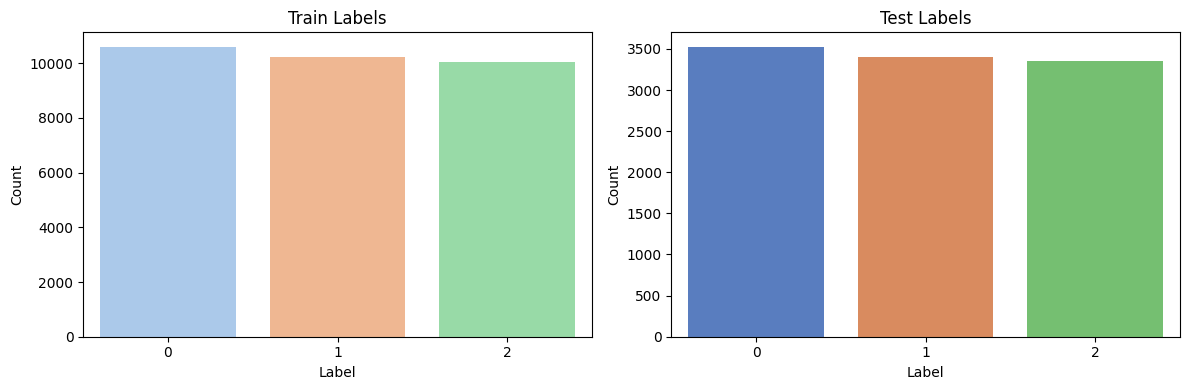

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

label_counts_train = train["label"].value_counts()
sns.barplot(x=label_counts_train.index, y=label_counts_train.values, palette="pastel", ax=axes[0])
axes[0].set_title("Train Labels")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")

label_counts_test = test["label"].value_counts()
sns.barplot(x=label_counts_test.index, y=label_counts_test.values, palette="muted", ax=axes[1])
axes[1].set_title("Test Labels")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()



> 0 - Russian Misinformation, 1 - Russian Propaganda, 2 - Real News

In [76]:
train["message_length"] = train["message"].apply(lambda x: len(str(x).split()))
test["message_length"] = test["message"].apply(lambda x: len(str(x).split()))
print('train:')
display(train["message_length"].describe())
print('test:')
display(test["message_length"].describe())



train:


count    30844.000000
mean        50.621839
std         63.909924
min          1.000000
25%         16.000000
50%         29.000000
75%         62.000000
max        683.000000
Name: message_length, dtype: float64

test:


count    10282.000000
mean        52.730597
std         67.809822
min          1.000000
25%         16.000000
50%         29.000000
75%         64.000000
max        637.000000
Name: message_length, dtype: float64

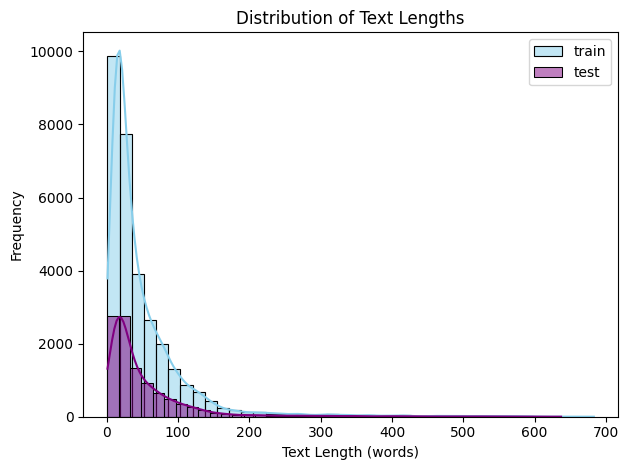

In [77]:
sns.histplot(train["message_length"], bins=40, kde=True, color="skyblue", label = 'train')
sns.histplot(test["message_length"], bins=40, kde=True, color="purple", label = 'test')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (words)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
for df in [test, train]:
    q_low = df["message_length"].quantile(0.10)
    df = df[df["message_length"] > q_low]

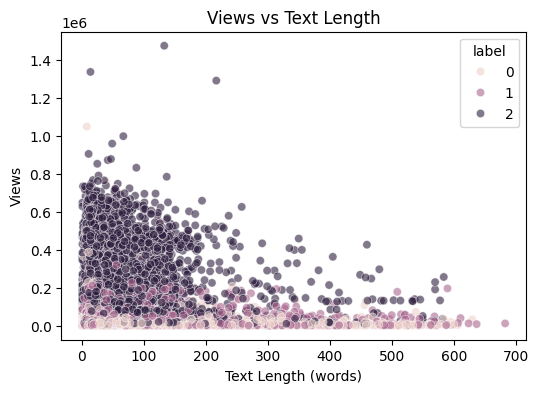

In [79]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=train, 
    x="message_length", 
    y="views", 
    hue="label",
    alpha=0.6
)

plt.title("Views vs Text Length")
plt.xlabel("Text Length (words)")
plt.ylabel("Views")
plt.show()


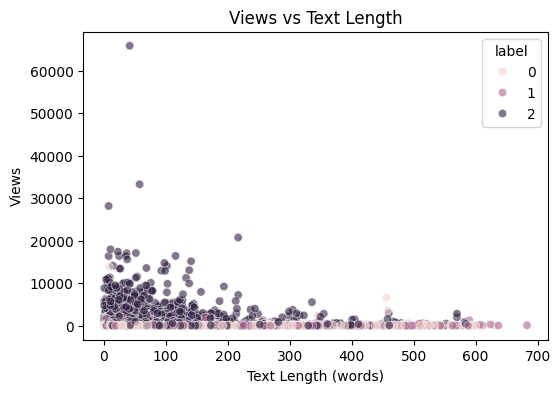

In [80]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=train, 
    x="message_length", 
    y="forwards", 
    hue="label", 
    alpha=0.6
)

plt.title("Views vs Text Length")
plt.xlabel("Text Length (words)")
plt.ylabel("Views")
plt.show()


In [81]:
train["date"] = pd.to_datetime(train["date"], errors="coerce")
test["date"] = pd.to_datetime(test["date"], errors="coerce")


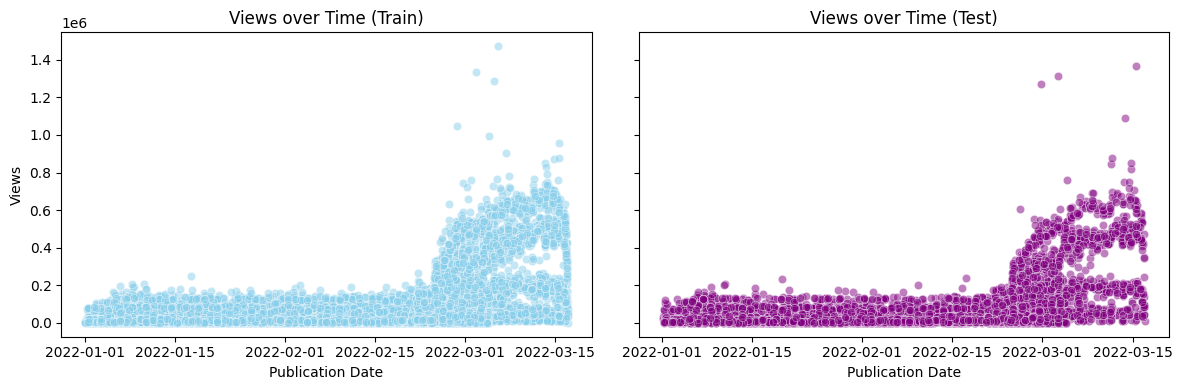

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.scatterplot(data=train, x="date", y="views", alpha=0.5, ax=axes[0], color="skyblue")
axes[0].set_title("Views over Time (Train)")
axes[0].set_xlabel("Publication Date")
axes[0].set_ylabel("Views")

sns.scatterplot(data=test, x="date", y="views", alpha=0.5, ax=axes[1], color="purple")
axes[1].set_title("Views over Time (Test)")
axes[1].set_xlabel("Publication Date")
axes[1].set_ylabel("Views")

plt.tight_layout()
plt.show()


In [83]:
test.head(2)

,date,message,views,forwards,label,message_length
0,2022-02-07 14:30:05+00:00,"О чем можно договориться с Западом в вопросах укрепления безопасности и контроля над вооружениями?\n\nОбсуждаем контрпредложения США и НАТО с ведущим российским специалистом по проблемам безопасности и разоружения, академиком РАН Алексеем Арбатовым.\n\n➡️ http://amp.gs/jm5gB",15662.0,15.0,2,34
1,2022-03-02 23:51:56+00:00,"""Зарплата маленькая"". Пленный рассказал, почему украинцы идут воевать против Донбасса.\n\nНачальник разведки противотанкового артиллерийского дивизиона 55-й артиллерийской бригады ВСУ Владислав Корнеенко добровольно сложил оружие и перешел на сторону ДНР под Волновахой.\n\nОн рассказал каналу Донбасс решает, что бедственное положение в стране заставляет украинских мужчин поддаваться на агитацию и брать в руки оружие.\n\nСвоих бывших сослуживцев пленный призвал последовать его примеру, чтобы сохранить жизнь.\n\n@donbassr",26132.0,53.0,0,64


In [84]:
import re

def remove_urls(text):
    url_pattern = r'http\S+|https\S+|t.me\S+'
    cleaned_text = re.sub(url_pattern, '', text)
    return cleaned_text

train['message'] = train.message.apply(remove_urls)
test['message'] = test.message.apply(remove_urls)

In [85]:
train["message"] = train["message"].str.replace(r"[\n\t]", " ", regex=True)
test["message"] = test["message"].str.replace(r"[\n\t]", " ", regex=True)

In [86]:
# import emoji


# train.message = train.message.apply(lambda s: emoji.replace_emoji(s, ''))
# test.message = test.message.apply(lambda s: emoji.replace_emoji(s, ''))


In [87]:
train.message = train.message.str.replace(r'@\w+\s?', '', regex=True)
train.message = train.message.str.lower()

test.message = test.message.str.replace(r'@\w+\s?', '', regex=True)
test.message = test.message.str.lower()


In [88]:
from string import digits, whitespace

cyrillic_letters = u"абвгдеёжзийклмнопрстуфхцчшщъыьэюя"


def strip_chars(text):
    allowed_chars = cyrillic_letters + digits + whitespace
    return "".join([c for c in text if c in allowed_chars]).strip()

train.message = train.message.apply(strip_chars)
test.message = test.message.apply(strip_chars)

In [89]:
train.message = train.message.str.replace(r'\s+', ' ', regex=True)
test.message = test.message.str.replace(r'\s+', ' ', regex=True)

In [90]:
train.head(10)

,date,message,views,forwards,label,message_length
0,2022-02-19 15:23:08+00:00,зеленский сообщил что настаивает на введении санкций в отношении россии уже сейчас,41389.0,60.0,1,13
1,2022-02-18 15:39:01+00:00,очень тревожно на донбассе очень,24552.0,6.0,0,5
2,2022-02-24 18:37:53+00:00,подписчики сообщают что все цветочные магазины киева пустые город ждёт российскую армию0,43939.0,160.0,0,13
3,2022-02-10 17:34:25+00:00,ох как прав леонид эдуардович уважаемый с этим своим фактически криком души даже добавить особо нечего нашим стратегическим партнерам очень советовал бы вновь перечитать или пересмотреть хроники мюнхена 2007 года в контексте игр коллективного запада вокруг гарантий безопасности это особенно актуально с слуцкий ну ведь прав по самому краешку ходят по самому увы,2514.0,1.0,0,55
4,2022-02-21 11:28:17+00:00,политсоветники нормандской четверки смогут встретиться только после заседания контактной группы по донбассу источник в москве,23272.0,21.0,0,17
5,2022-01-24 13:07:06+00:00,киевская экономика пожухла таллин наконецто узнал про энергокризис литва против русалки,18849.0,12.0,0,12
6,2022-01-19 14:57:10+00:00,фермеры новой зеландии готовы работать только на машинах с климат и круизконтролем миллионы водителей сверхдержавы 3 года копил на ласточку с сосисок и шавы,2435.0,3.0,1,26
7,2022-02-23 08:57:51+00:00,весь мариуполь вышел в полночь к драмтеатру чтобы заклеймить агрессора ах да не все а только лучшие люди не все лучшие люди а несколько человек остальные чемоданы трамбовали,1993.0,8.0,0,28
8,2022-02-10 09:01:06+00:00,по старому анекдоту первое что спросил папа римский на французской земле есть ли в париже бордели с такой политик достоин стать лидером лдпр например,15111.0,77.0,2,26
9,2022-03-03 13:01:05+00:00,криптобиржа сообщила что ограничила доступ держателям карт российских банков попавших под международные санкции,338424.0,835.0,2,15


In [91]:
train = train.dropna()
test = test.dropna()

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30774 entries, 0 to 30843
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            30774 non-null  datetime64[ns, UTC]
 1   message         30774 non-null  object             
 2   views           30774 non-null  float64            
 3   forwards        30774 non-null  float64            
 4   label           30774 non-null  int64              
 5   message_length  30774 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(1)
memory usage: 1.6+ MB


## Removing stopwords

In [99]:
import nltk
nltk.download('stopwords')
stop_ru = set(stopwords.words('russian'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariaonyshchuk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data]   Unzipping corpora/stopwords.zip.


In [101]:
def remove_stopwords(text):
    text = str(text).lower()
    tokens = re.findall(r'\w+', text, flags=re.UNICODE)
    filtered = [t for t in tokens if t not in stop_ru]
    return ' '.join(filtered)

train['message_nostop'] = train['message'].apply(remove_stopwords)
test['message_nostop'] = test['message'].apply(remove_stopwords)


In [102]:
train

,date,message,views,forwards,label,message_length,message_nostop
0,2022-02-19 15:23:08+00:00,зеленский сообщил что настаивает на введении санкций в отношении россии уже сейчас,41389.0,60.0,1,13,зеленский сообщил настаивает введении санкций отношении россии
1,2022-02-18 15:39:01+00:00,очень тревожно на донбассе очень,24552.0,6.0,0,5,очень тревожно донбассе очень
2,2022-02-24 18:37:53+00:00,подписчики сообщают что все цветочные магазины киева пустые город ждёт российскую армию0,43939.0,160.0,0,13,подписчики сообщают цветочные магазины киева пустые город ждёт российскую армию0
3,2022-02-10 17:34:25+00:00,ох как прав леонид эдуардович уважаемый с этим своим фактически криком души даже добавить особо нечего нашим стратегическим партнерам очень советовал бы вновь перечитать или пересмотреть хроники мюнхена 2007 года в контексте игр коллективного запада вокруг гарантий безопасности это особенно актуально с слуцкий ну ведь прав по самому краешку ходят по самому увы,2514.0,1.0,0,55,ох прав леонид эдуардович уважаемый этим своим фактически криком души добавить особо нечего нашим стратегическим партнерам очень советовал вновь перечитать пересмотреть хроники мюнхена 2007 года контексте игр коллективного запада вокруг гарантий безопасности это особенно актуально слуцкий прав самому краешку ходят самому увы
4,2022-02-21 11:28:17+00:00,политсоветники нормандской четверки смогут встретиться только после заседания контактной группы по донбассу источник в москве,23272.0,21.0,0,17,политсоветники нормандской четверки смогут встретиться заседания контактной группы донбассу источник москве
...,...,...,...,...,...,...,...
30839,2022-03-01 15:01:07+00:00,международная федерация баскетбола отстранила российских спортсменов от участия в международных соревнованиях под эгидой организации,472832.0,71.0,2,14,международная федерация баскетбола отстранила российских спортсменов участия международных соревнованиях эгидой организации
30840,2022-01-29 16:04:04+00:00,удивительно точно совпадают ощущения но надежда ещё осталась пс александр теперь каждый день чтото пишет в канале не останавливайся,10933.0,7.0,0,20,удивительно точно совпадают ощущения надежда ещё осталась пс александр каждый день чтото пишет канале останавливайся
30841,2022-01-24 10:49:28+00:00,высокий суд лондона разрешил основателю ассанжу обжаловать в верховном суде решение по делу о его экстрадиции в сша,6131.0,10.0,1,19,высокий суд лондона разрешил основателю ассанжу обжаловать верховном суде решение делу экстрадиции сша
30842,2022-02-27 12:36:33+00:00,говорят что политиков и представителей власти украины желающих выехать на переговоры с россией в гомель слишком много не влезают в поезд пусть посмотрят видео из кабула там инструкция прям почти,31184.0,85.0,0,31,говорят политиков представителей власти украины желающих выехать переговоры россией гомель слишком влезают поезд пусть посмотрят видео кабула инструкция прям


In [103]:
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)

In [106]:
pro_russ = pd.DataFrame()
pro_russ = train[train.label == 0]

In [109]:
propaganda = pd.DataFrame()
propaganda = train[train.label == 1]

In [107]:
pro_russ.describe()

,views,forwards,label,message_length
count,1.053100e+04,10531.000000,10531.0,10531.000000
mean,2.089452e+04,57.832400,0.0,52.495490
std,3.707844e+04,280.768912,0.0,71.652023
min,1.000000e+01,0.000000,0.0,1.000000
25%,3.679000e+03,3.000000,0.0,15.000000
50%,1.224500e+04,11.000000,0.0,29.000000
75%,2.376150e+04,36.000000,0.0,61.000000
max,1.047846e+06,13870.000000,0.0,630.000000


# Lemmatization of the text

In [120]:
import pymorphy3

morph = pymorphy3.MorphAnalyzer()
def lemmatize_text(text):
    return " ".join([morph.parse(word)[0].normal_form for word in str(text).split()])

train["message_lemmatized"] = train["message_nostop"].apply(lemmatize_text)
test["message_lemmatized"] = test["message_nostop"].apply(lemmatize_text)


In [122]:
train.head(2)

,date,message,views,forwards,label,message_length,message_nostop,message_lemmatized
0,2022-02-19 15:23:08+00:00,зеленский сообщил что настаивает на введении санкций в отношении россии уже сейчас,41389.0,60.0,1,13,зеленский сообщил настаивает введении санкций отношении россии,зеленский сообщить настаивать введение санкция отношение россия
1,2022-02-18 15:39:01+00:00,очень тревожно на донбассе очень,24552.0,6.0,0,5,очень тревожно донбассе очень,очень тревожный донбасс очень


## WordCloud and top 20 most frequent
### WARINING: disgusting content 💩

In [121]:
misinfo, propaganda, opposition = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
misinfo = train[train.label == 0]
propaganda = train[train.label == 1]
opposition = train[train.label == 2]

Top 20 words in Misinfo:


,word,count
0,это,3382
1,россия,3281
2,украина,3233
3,донбасс,2994
4,который,2554
5,днр,2139
6,год,2064
7,украинский,1922
8,наш,1642
9,человек,1599


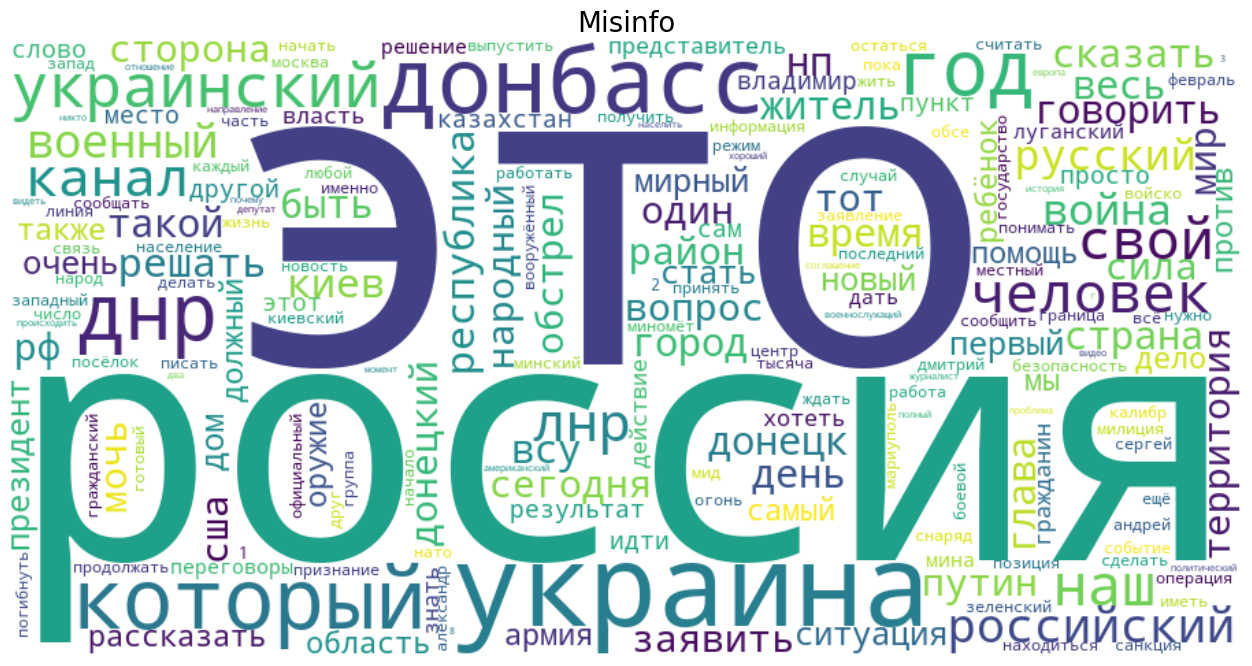

Top 20 words in Propaganda:


,word,count
0,россия,3789
1,украина,3089
2,это,2307
3,который,2145
4,заявить,1820
5,год,1790
6,российский,1732
7,рф,1455
8,сша,1441
9,сообщить,1379


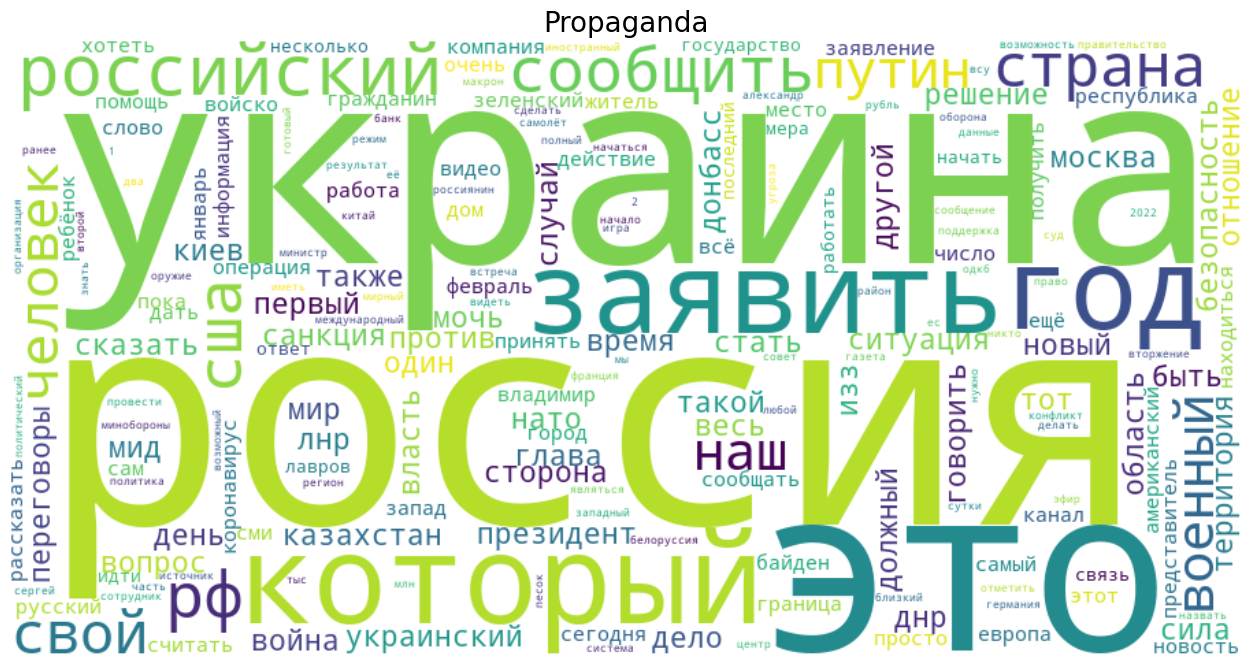

Top 20 words in Opposition:


,word,count
0,иностранный,7874
1,агент,5145
2,выполнять,5062
3,функция,5024
4,российский,4952
5,россия,4044
6,информация,2976
7,украина,2899
8,сообщение,2722
9,материал,2698


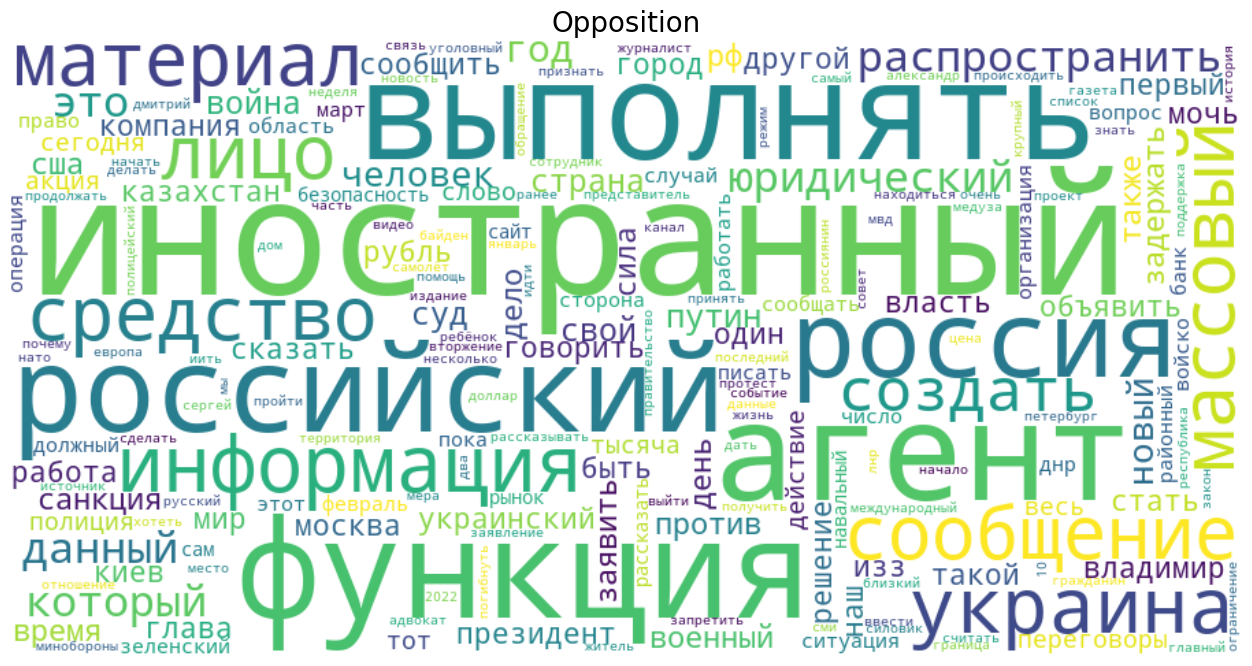

In [123]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(df, column, title):
    text = ' '.join(df[column].astype(str))
    tokens = re.findall(r'\w+', text.lower(), flags=re.UNICODE)
    counts = Counter(tokens)
    
    if not counts:
        print(f"No tokens found in {title}")
        return
    
    top20 = counts.most_common(20)
    print(f"Top 20 words in {title}:")
    display(pd.DataFrame(top20, columns=['word', 'count']))
    
    wc = WordCloud(width=900, height=450, background_color='white').generate_from_frequencies(counts)
    plt.figure(figsize=(16,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

for df, name in zip([misinfo, propaganda, opposition], ["Misinfo", "Propaganda", "Opposition"]):
    generate_wordcloud(df, "message_lemmatized", name)


# Training ML models

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

df = pd.concat([
    misinfo.assign(label='misinformation'),
    propaganda.assign(label='propaganda'),
    opposition.assign(label='opposition')
], ignore_index=True)


X = df['message_lemmatized']
y = df['label']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=500, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


--- Naive Bayes ---
Classification Report:
                precision    recall  f1-score   support

misinformation       0.68      0.77      0.72      2106
    opposition       0.77      0.63      0.69      2006
    propaganda       0.61      0.64      0.63      2043

      accuracy                           0.68      6155
     macro avg       0.69      0.68      0.68      6155
  weighted avg       0.69      0.68      0.68      6155

Confusion Matrix:
[[1623  109  374]
 [ 292 1254  460]
 [ 475  257 1311]]

--- Random Forest ---
Classification Report:
                precision    recall  f1-score   support

misinformation       0.67      0.80      0.73      2106
    opposition       0.78      0.64      0.71      2006
    propaganda       0.62      0.61      0.62      2043

      accuracy                           0.69      6155
     macro avg       0.69      0.69      0.69      6155
  weighted avg       0.69      0.69      0.69      6155

Confusion Matrix:
[[1691   91  324]
 [ 286 1285